# Behavior Cloning (Viz)

In [1]:
import os
import datetime
import csv
import cv2
import numpy as np

from transform import flipimg, cropimg, crop_and_resize

import matplotlib.pyplot as plt
%matplotlib inline

## Load images

In [2]:
data_dir = './data'

In [3]:
car_images = []
steering_angles = []
with open(os.path.join(data_dir, 'driving_log.csv'), 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)  # skip the headers
    for row in reader:
        steering_center = float(row[3])

        # create adjusted steering measurements for the side camera images
        correction = 0.5 # this is a parameter to tune
        steering_left = steering_center + correction
        steering_right = steering_center - correction

        # read in images from center, left and right cameras
        path = os.path.join(data_dir, 'IMG')
        img_center = cv2.imread(os.path.join(path, row[0].split('/')[-1]))
        img_left = cv2.imread(os.path.join(path, row[1].split('/')[-1]))
        img_right = cv2.imread(os.path.join(path, row[2].split('/')[-1]))

        # add images and angles to data set
        car_images.extend([img_center, img_left, img_right])
        steering_angles.extend([steering_center, steering_left, steering_right])

X_train = np.array(car_images)
y_train = np.array(steering_angles)

In [4]:
X_train.shape, y_train.shape

((24108, 160, 320, 3), (24108,))

## Visualization

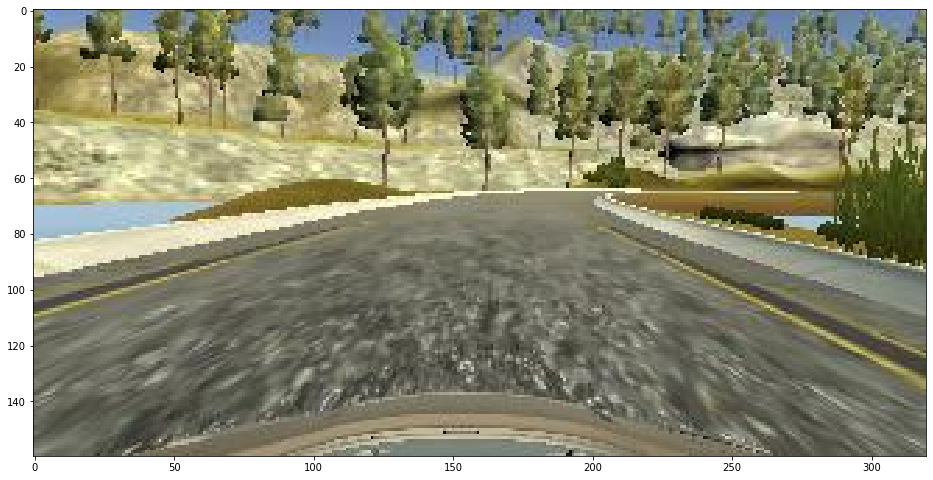

In [29]:
f, axs = plt.subplots(1, 1, figsize=(16, 9))
axs.imshow(cv2.cvtColor(X_train[666], cv2.COLOR_RGB2BGR))
plt.savefig('./images/center.png', bbox_inches='tight', pad_inches=0.2)

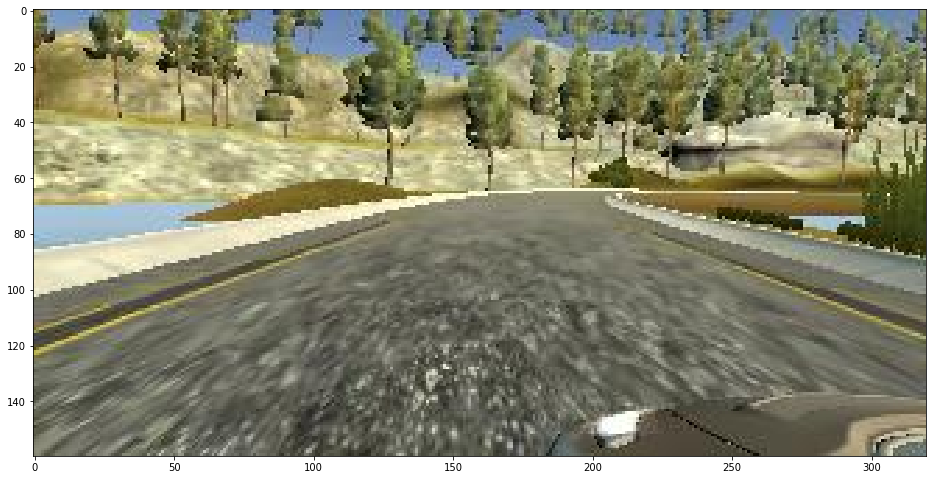

In [30]:
f, axs = plt.subplots(1, 1, figsize=(16, 9))
axs.imshow(cv2.cvtColor(X_train[667], cv2.COLOR_RGB2BGR))
plt.savefig('./images/left.png', bbox_inches='tight', pad_inches=0.2)

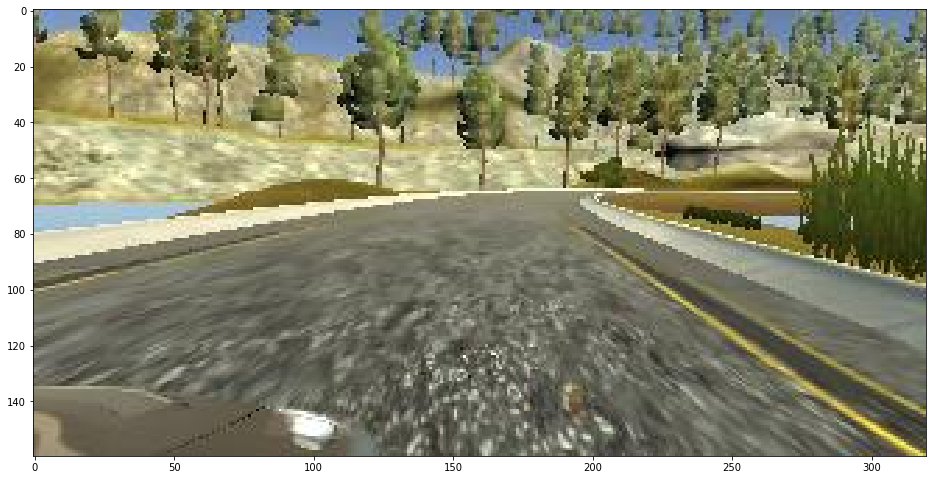

In [36]:
f, axs = plt.subplots(1, 1, figsize=(16, 9))
axs.imshow(cv2.cvtColor(X_train[668], cv2.COLOR_RGB2BGR))
plt.savefig('./images/right.png', bbox_inches='tight', pad_inches=0.2)

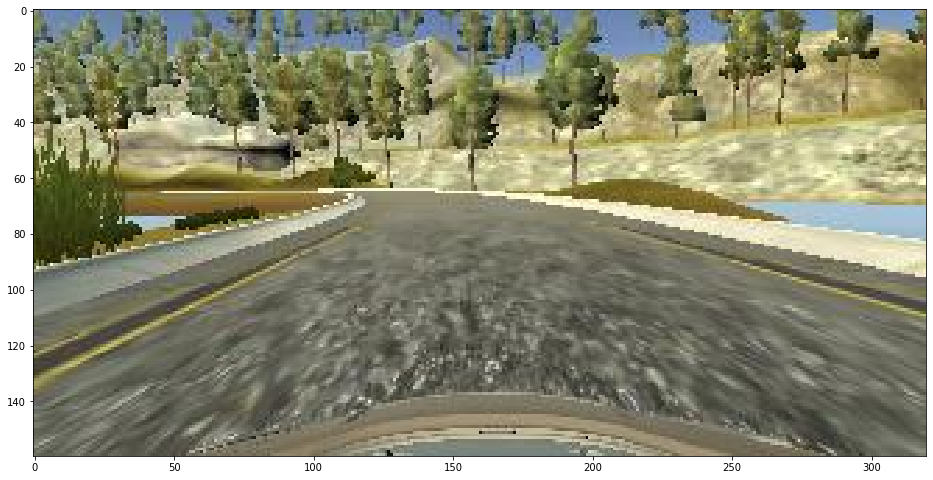

In [37]:
f, axs = plt.subplots(1, 1, figsize=(16, 9))
axs.imshow(cv2.cvtColor(flipimg(X_train[666]), cv2.COLOR_RGB2BGR))
plt.savefig('./images/flipping.png', bbox_inches='tight', pad_inches=0.2)

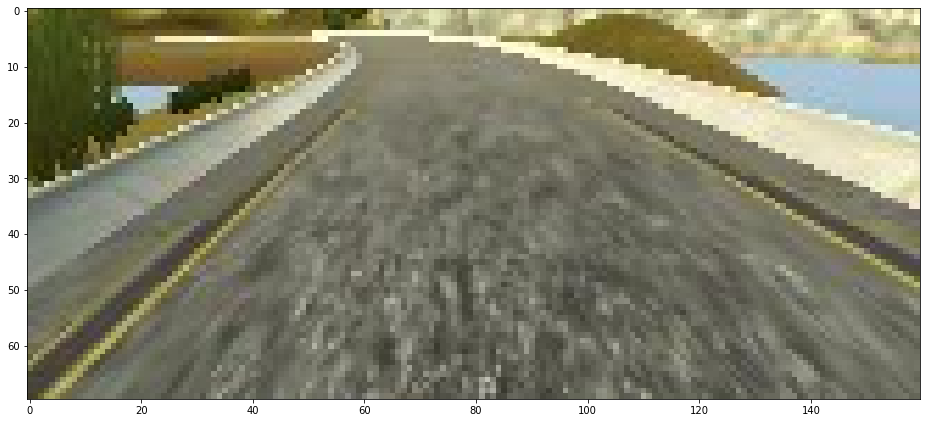

In [42]:
f, axs = plt.subplots(1, 1, figsize=(16, 9))
axs.imshow(cv2.cvtColor(crop_and_resize(flipimg(X_train[666])), cv2.COLOR_RGB2BGR))
plt.savefig('./images/resizing.png', bbox_inches='tight', pad_inches=0.2)